# Example 1
Considerando el problema 3-SAT para la expresión lógica contenida en el archivo 'uf20.py', definida con 20 variables y 91 cláusulas que se sabe que es satisfacible, se intenta resolverlo usando Hill Climbing. Se pide que:
1. Proponga una representación para las posibles soluciones y determine el tamaño del espacio de búsqueda asociado a esa representación.
2. Proponga una función de evaluación.
3. De na la manera en que se obtienen las soluciones vecinas a la solución actual.
Intente resolverlo ahora empleando un Algoritmo Evolutivo. Se pide que:
4. Proponga una representación para las posibles soluciones y una función de evaluación. Describa las diferencias, si las hay, con las propuestas anteriormente.
5. Defina que operadores van a usarse durante el proceso evolutivo.

Implemente y pruebe lo de nido en los puntos anteriores. Evalúe los resultados obtenidos.
Indique los valores de los parámetros usados durante la ejecución de ambos algoritmos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import mpld3

%matplotlib inline
mpld3.enable_notebook()

from resources.uf20 import f_1
from utils.busqueda_local import hill_climb
from deap import base, creator, tools, algorithms

# Hill Climbing
## Evaluacion

In [2]:
def evaluacion(x):
    return f_1(*x).count(True)

## Vecinos

In [3]:
def vecinos(x):
    v = []
    for i in range(5):
        pos = np.random.randint(0,19)
        x[pos] = not x[pos]
        v.append(x)
    return v

## Nuevos

In [4]:
def nuevos():
    return np.random.random(20)<0.5

## Busco

In [5]:
def buscar(i):
    mejor = nuevos()
    for j in range(i):
        print("\nEvaluacion mejor",evaluacion(mejor))
        mejor, evaluaciones = hill_climb(mejor, evaluacion, vecinos)
    return

In [6]:
buscar(5)

('\nEvaluacion mejor', 82)
('\nEvaluacion mejor', 82)
('\nEvaluacion mejor', 78)
('\nEvaluacion mejor', 78)
('\nEvaluacion mejor', 75)


# Algoritmo Evolutivo

## Funcion para crear individuos

In [7]:
def nuevoGEN():
    return np.random.random()<0.5

## Funcion Evaluacion

In [8]:
def evaluarADN(x):
        return [f_1(*x).count(True)]

## Defino Fitness Esperado

In [9]:
creator.create("FitnessMax", base.Fitness, weights=(-9999,))
creator.create("Individual", list, fitness=creator.FitnessMax)

## Defino ADN del Individuo

In [10]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, nuevoGEN, n=20)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Defino Evaluacion, Seleccion y Mutacion

In [11]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

In [12]:
def main():    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg  	min	max
0  	50    	80.12	71 	86 
1  	25    	77.48	71 	86 
2  	26    	75.6 	70 	85 
3  	30    	73.68	65 	82 
4  	30    	71.76	65 	79 
5  	24    	70.24	64 	78 
6  	28    	68.46	64 	75 
7  	35    	67.32	62 	77 
8  	38    	66.3 	62 	77 
9  	27    	64.88	62 	72 
10 	28    	64.66	62 	76 
Best individual is: [True, True, True, False, True, True, False, True, False, True, False, False, True, False, True, True, False, True, False, False]
with fitness: (62.0,)


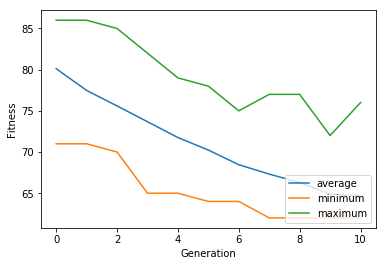

In [13]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")